## Case Study - Marketing Analytics

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.options.display.max_rows = 10

In [2]:
%matplotlib inline

# Conversion Rate

In [3]:
url = 'http://people.bu.edu/kalathur/datasets/bank-additional-full.csv'
df = pd.read_csv(url, sep=';')

In [4]:
df.shape

(41188, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df[['age','job','education','contact','duration','campaign','y']]

,age,job,education,contact,duration,campaign,y
0,56,housemaid,basic.4y,telephone,261,1,no
1,57,services,high.school,telephone,149,1,no
2,37,services,high.school,telephone,226,1,no
3,40,admin.,basic.6y,telephone,151,1,no
4,56,services,high.school,telephone,307,1,no
...,...,...,...,...,...,...,...
41183,73,retired,professional.course,cellular,334,1,yes
41184,46,blue-collar,professional.course,cellular,383,1,no
41185,56,retired,university.degree,cellular,189,2,no
41186,44,technician,professional.course,cellular,442,1,yes


In [7]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [8]:
df[['age','job','education','contact','duration','campaign','y','conversion']]

,age,job,education,contact,duration,campaign,y,conversion
0,56,housemaid,basic.4y,telephone,261,1,no,0
1,57,services,high.school,telephone,149,1,no,0
2,37,services,high.school,telephone,226,1,no,0
3,40,admin.,basic.6y,telephone,151,1,no,0
4,56,services,high.school,telephone,307,1,no,0
...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,cellular,334,1,yes,1
41184,46,blue-collar,professional.course,cellular,383,1,no,0
41185,56,retired,university.degree,cellular,189,2,no,0
41186,44,technician,professional.course,cellular,442,1,yes,1


In [9]:
df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
      ...  
43        2
37        1
39        1
41        1
56        1
Name: campaign, Length: 42, dtype: int64

### 1. Aggregate Conversion Rate

In [10]:
print('Total conversions: {} out of {}'.format(
    df.conversion.sum(), len(df)))

Total conversions: 4640 out of 41188


In [11]:
print('Conversion rate: {:.2f}%'.format(
    df.conversion.sum() / len(df) * 100.0))

Conversion rate: 11.27%


### 2. Conversion Rates by Number of Contacts

In [12]:
df.groupby('campaign')['conversion'].sum()

campaign
1     2300
2     1211
3      574
4      249
5      120
      ... 
40       0
41       0
42       0
43       0
56       0
Name: conversion, Length: 42, dtype: int64

In [13]:
df.groupby('campaign')['conversion'].count()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
      ...  
40        2
41        1
42        2
43        2
56        1
Name: conversion, Length: 42, dtype: int64

In [14]:
conversions_by_contacts = df.groupby('campaign')['conversion'].agg(
    [np.sum, len])
conversions_by_contacts

,sum,len
campaign,,
1,2300,17642
2,1211,10570
3,574,5341
4,249,2651
5,120,1599
...,...,...
40,0,2
41,0,1
42,0,2


In [15]:
pd.crosstab(df['campaign'], df['conversion'], margins=all).drop(0, axis=1)

conversion,1,All
campaign,,
1,2300,17642
2,1211,10570
3,574,5341
4,249,2651
5,120,1599
...,...,...
41,0,1
42,0,2
43,0,2


In [16]:
conversions_by_contacts['rate'] = conversions_by_contacts[
    'sum'] / conversions_by_contacts['len'] * 100.0
conversions_by_contacts

,sum,len,rate
campaign,,,
1,2300,17642,13.037071
2,1211,10570,11.456954
3,574,5341,10.747051
4,249,2651,9.392682
5,120,1599,7.504690
...,...,...,...
40,0,2,0.000000
41,0,1,0.000000
42,0,2,0.000000


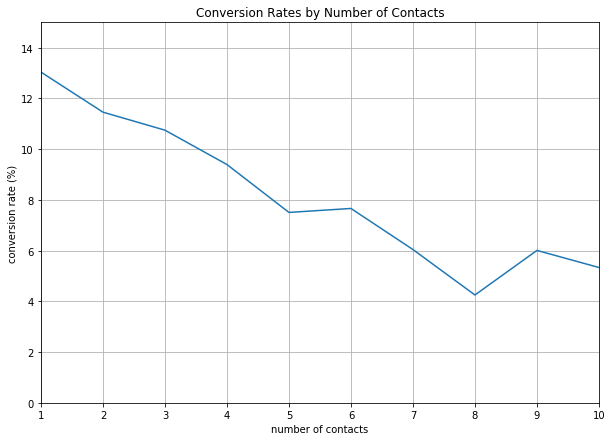

In [17]:
ax = conversions_by_contacts['rate'][:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()

### 3. Conversion Rates by Age

In [18]:
conversions_by_age = df.groupby('age')['conversion'].agg(
    [np.sum, len])

conversions_by_age

,sum,len
age,,
17,2,5
18,12,28
19,20,42
20,23,65
21,29,102
...,...,...
91,0,2
92,3,4
94,0,1


In [19]:
# same as

pd.crosstab(df['age'], df['conversion'], margins=all).drop(0, axis=1)


conversion,1,All
age,,
17,2,5
18,12,28
19,20,42
20,23,65
21,29,102
...,...,...
92,3,4
94,0,1
95,0,1


In [20]:
conversions_by_age['rate'] = \
    conversions_by_age['sum']/conversions_by_age['len'] * 100.0

conversions_by_age.sort_values(by='rate', ascending=False)

,sum,len,rate
age,,,
98,2,2,100.000000
89,2,2,100.000000
87,1,1,100.000000
92,3,4,75.000000
77,13,20,65.000000
...,...,...,...
49,55,839,6.555423
47,58,928,6.250000
91,0,2,0.000000


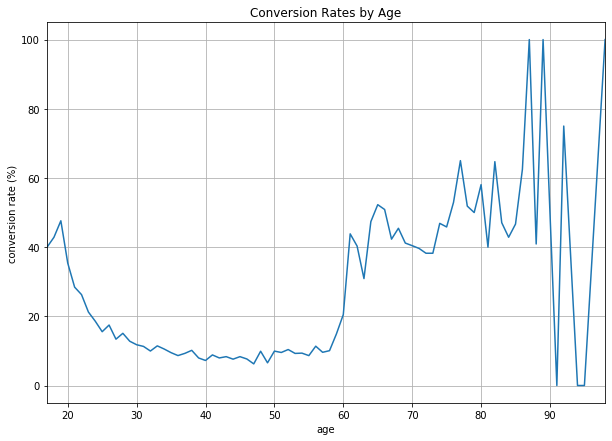

In [21]:
ax = conversions_by_age['rate'].plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

#### Analyze by Age Groups

In [22]:
df['age'].min(), df['age'].max()

(17, 98)

In [23]:
df['age_group'] = df['age'].apply(
    lambda x: '[17, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [24]:
df[['age','age_group','job','education','contact','duration','campaign','y','conversion']]

,age,age_group,job,education,contact,duration,campaign,y,conversion
0,56,"[50, 60)",housemaid,basic.4y,telephone,261,1,no,0
1,57,"[50, 60)",services,high.school,telephone,149,1,no,0
2,37,"[30, 40)",services,high.school,telephone,226,1,no,0
3,40,"[40, 50)",admin.,basic.6y,telephone,151,1,no,0
4,56,"[50, 60)",services,high.school,telephone,307,1,no,0
...,...,...,...,...,...,...,...,...,...
41183,73,70+,retired,professional.course,cellular,334,1,yes,1
41184,46,"[40, 50)",blue-collar,professional.course,cellular,383,1,no,0
41185,56,"[50, 60)",retired,university.degree,cellular,189,2,no,0
41186,44,"[40, 50)",technician,professional.course,cellular,442,1,yes,1


In [25]:
df['age_group'] = pd.cut(df['age'], 
                         [17,30,40,50,60,70,100], right=False)

df[['age','age_group','job','education','contact','duration','campaign','y','conversion']]

,age,age_group,job,education,contact,duration,campaign,y,conversion
0,56,"[50, 60)",housemaid,basic.4y,telephone,261,1,no,0
1,57,"[50, 60)",services,high.school,telephone,149,1,no,0
2,37,"[30, 40)",services,high.school,telephone,226,1,no,0
3,40,"[40, 50)",admin.,basic.6y,telephone,151,1,no,0
4,56,"[50, 60)",services,high.school,telephone,307,1,no,0
...,...,...,...,...,...,...,...,...,...
41183,73,"[70, 100)",retired,professional.course,cellular,334,1,yes,1
41184,46,"[40, 50)",blue-collar,professional.course,cellular,383,1,no,0
41185,56,"[50, 60)",retired,university.degree,cellular,189,2,no,0
41186,44,"[40, 50)",technician,professional.course,cellular,442,1,yes,1


In [26]:
conversions_by_age_group = df.groupby('age_group')['conversion'].agg(
    [np.sum, len])
conversions_by_age_group

,sum,len
age_group,,
"[17, 30)",922,5669
"[30, 40)",1715,16938
"[40, 50)",834,10526
"[50, 60)",697,6862
"[60, 70)",251,724
"[70, 100)",221,469


In [27]:
# same as

pd.crosstab(df['age_group'], df['conversion'], margins=True).drop(0, axis=1)

conversion,1,All
age_group,,
"[17, 30)",922,5669
"[30, 40)",1715,16938
"[40, 50)",834,10526
"[50, 60)",697,6862
"[60, 70)",251,724
"[70, 100)",221,469
All,4640,41188


In [28]:
conversions_by_age_group['rate'] = \
    conversions_by_age_group['sum']/conversions_by_age_group['len']*100

conversions_by_age_group

,sum,len,rate
age_group,,,
"[17, 30)",922,5669,16.263891
"[30, 40)",1715,16938,10.125162
"[40, 50)",834,10526,7.923238
"[50, 60)",697,6862,10.157389
"[60, 70)",251,724,34.668508
"[70, 100)",221,469,47.121535


In [29]:
conversions_by_age_group.sort_values(by='rate', ascending=False)

,sum,len,rate
age_group,,,
"[70, 100)",221,469,47.121535
"[60, 70)",251,724,34.668508
"[17, 30)",922,5669,16.263891
"[50, 60)",697,6862,10.157389
"[30, 40)",1715,16938,10.125162
"[40, 50)",834,10526,7.923238


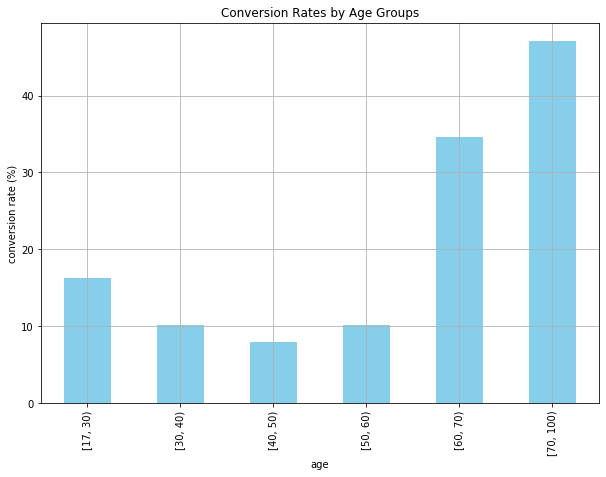

In [30]:
ax = conversions_by_age_group['rate'].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

### 4. Conversions vs. Non-Conversions

#### 4.1. Marital Status

In [31]:
conversions_by_marital_status = \
    df.pivot_table(index='marital', columns='conversion',
                   values='y', aggfunc=len)

conversions_by_marital_status

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [32]:
pd.crosstab(df['marital'], df['conversion'])

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [33]:
conversions_by_marital_status.columns = ['non_conversions', 'conversions']
conversions_by_marital_status

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


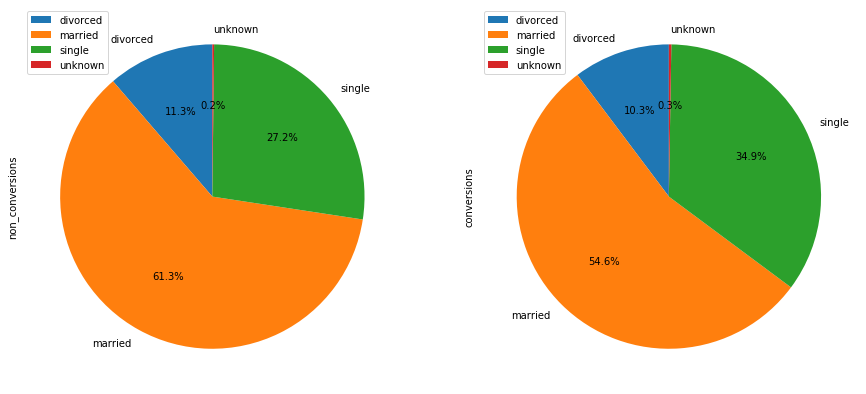

In [34]:
conversions_by_marital_status.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

#### 4.2. Education

In [35]:
conversions_by_education = df.pivot_table(
    index='education', columns='conversion',
    values='y',  aggfunc=len)

conversions_by_education

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [36]:
# same as

pd.crosstab(df['education'], df['conversion'])

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [37]:
conversions_by_education.columns = ['non_conversions', 'conversions']
conversions_by_education

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


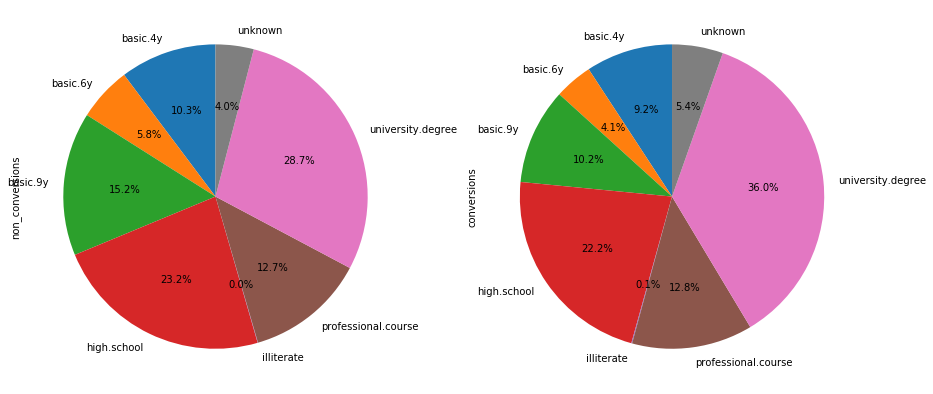

In [38]:
conversions_by_education.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

#### 4.3. Last Contact Duration

In [39]:
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [40]:
duration_conversions = \
    df.loc[df['conversion'] == 1, 'duration'].reset_index(drop=True)

duration_conversions

0       1575
1       1042
2       1467
3        579
4        461
        ... 
4635     208
4636     483
4637     281
4638     334
4639     442
Name: duration, Length: 4640, dtype: int64

In [41]:
duration_nonconversions = \
    df.loc[df['conversion'] == 0, 'duration'].reset_index(drop=True)

duration_nonconversions

0        261
1        149
2        226
3        151
4        307
        ... 
36543    254
36544    112
36545    383
36546    189
36547    239
Name: duration, Length: 36548, dtype: int64

In [42]:
durations_df = pd.DataFrame(
    {'conversions': duration_conversions,
     'non_conversions': duration_nonconversions})

durations_df

,conversions,non_conversions
0,1575.0,261
1,1042.0,149
2,1467.0,226
3,579.0,151
4,461.0,307
...,...,...
36543,NaN,254
36544,NaN,112
36545,NaN,383
36546,NaN,189


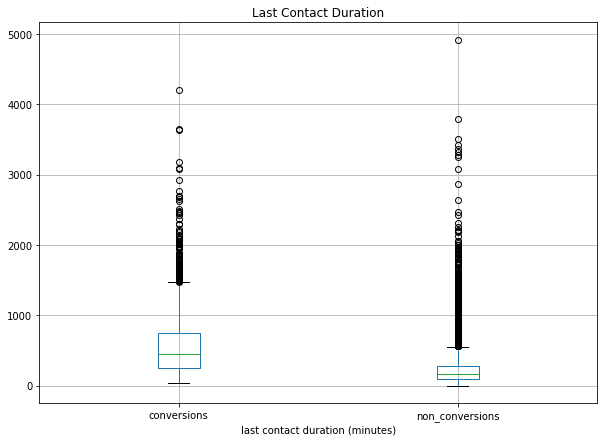

In [43]:
ax = durations_df.plot(
    kind='box', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Last Contact Duration')
ax.set_xlabel('last contact duration (minutes)')

plt.show()

### 5. Conversions by Age Groups & Marital Status

In [44]:
df.groupby(['age_group', 'marital'])['conversion'].sum().unstack()

marital,divorced,married,single,unknown
age_group,,,,
"[17, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40, 50)",126.0,575.0,130.0,3.0
"[50, 60)",119.0,533.0,44.0,1.0
"[60, 70)",27.0,218.0,5.0,1.0
"[70, 100)",64.0,151.0,6.0,NaN


In [45]:
# same as

df.pivot_table(
    index='age_group', columns='marital',
    values='conversion',  aggfunc=np.sum)

marital,divorced,married,single,unknown
age_group,,,,
"[17, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40, 50)",126.0,575.0,130.0,3.0
"[50, 60)",119.0,533.0,44.0,1.0
"[60, 70)",27.0,218.0,5.0,1.0
"[70, 100)",64.0,151.0,6.0,NaN


In [46]:
# same as

pd.crosstab([df['conversion'], df['age_group']], df['marital']).xs(1)


marital,divorced,married,single,unknown
age_group,,,,
"[17, 30)",12,158,751,1
"[30, 40)",128,897,684,6
"[40, 50)",126,575,130,3
"[50, 60)",119,533,44,1
"[60, 70)",27,218,5,1
"[70, 100)",64,151,6,0


In [47]:
age_marital_df = df.pivot_table(
    index='age_group', columns='marital',
    values='conversion',  aggfunc=np.sum).fillna(0)

age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
"[17, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40, 50)",126.0,575.0,130.0,3.0
"[50, 60)",119.0,533.0,44.0,1.0
"[60, 70)",27.0,218.0,5.0,1.0
"[70, 100)",64.0,151.0,6.0,0.0


In [48]:
group_counts = df.groupby('age_group')['conversion'].count()
group_counts

age_group
[17, 30)      5669
[30, 40)     16938
[40, 50)     10526
[50, 60)      6862
[60, 70)       724
[70, 100)      469
Name: conversion, dtype: int64

In [49]:
age_marital_df = age_marital_df.divide(group_counts,axis=0)

age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
"[17, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381
"[70, 100)",0.136461,0.321962,0.012793,0.000000


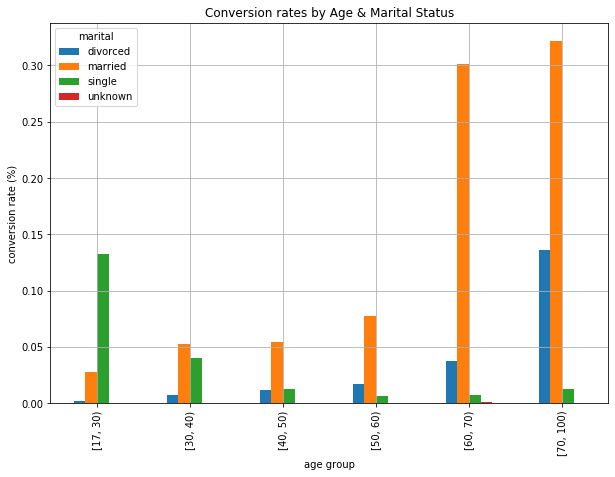

In [50]:
ax = age_marital_df.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

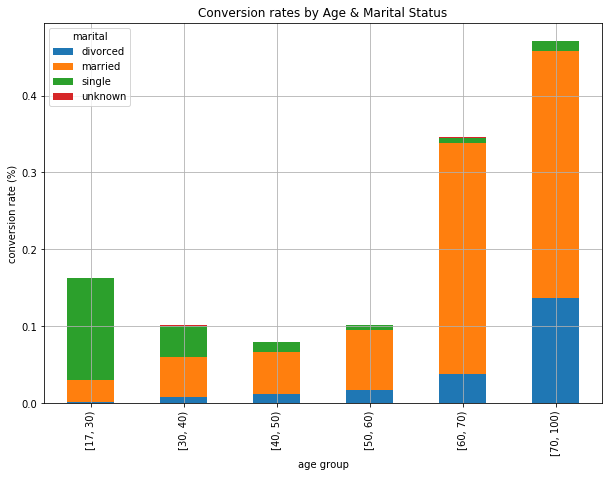

In [51]:
ax = age_marital_df.plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()